In [1]:
import numpy as np

import pandas as pd 

import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn import metrics

from pandas_profiling import ProfileReport

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

from sklearn.feature_selection import RFE

/Users/booba/Desktop/script.py/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/fd/b6_hc3516_b4khq0dtrt_gpr0000gn/T/ipykernel_1072/3179331285.py:17: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
DataElecCar = pd.read_csv('/Users/booba/Downloads/Electric_cars_dataset.csv')

In [3]:
print(DataElecCar.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64353 entries, 0 to 64352
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 64353 non-null  object 
 1   VIN (1-10)                                         64353 non-null  object 
 2   County                                             64349 non-null  object 
 3   City                                               64344 non-null  object 
 4   State                                              64342 non-null  object 
 5   ZIP Code                                           64347 non-null  float64
 6   Model Year                                         64346 non-null  float64
 7   Make                                               64349 non-null  object 
 8   Model                                              64340 non-null  object 
 9   Electr

In [5]:
print(DataElecCar.head(4))

        ID  VIN (1-10)     County        City State  ZIP Code  Model Year  \
0  EV33174  5YJ3E1EC6L  Snohomish    LYNNWOOD    WA   98037.0      2020.0   
1  EV40247  JN1AZ0CP8B     Skagit  BELLINGHAM    WA   98229.0      2011.0   
2  EV12248  WBY1Z2C56F     Pierce      TACOMA    WA   98422.0      2015.0   
3  EV55713  1G1RD6E44D       King     REDMOND    WA   98053.0      2013.0   

        Make    Model                   Electric Vehicle Type  \
0      TESLA  MODEL 3          Battery Electric Vehicle (BEV)   
1     NISSAN     LEAF          Battery Electric Vehicle (BEV)   
2        BMW       I3          Battery Electric Vehicle (BEV)   
3  CHEVROLET     VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible             308   
1           Clean Alternative Fuel Vehicle Eligible              73   
2           Clean Alternative Fuel Vehicle Eligible              81   
3   

In [6]:
print(DataElecCar.describe())

           ZIP Code    Model Year  Electric Range      Base MSRP  \
count  64347.000000  64346.000000    64353.000000   64353.000000   
mean   98143.452888   2018.186212      106.948985    2524.990754   
std     2856.064329      2.726742      104.093919   12402.895104   
min      745.000000   1993.000000        0.000000       0.000000   
25%    98052.000000   2017.000000       14.000000       0.000000   
50%    98121.000000   2018.000000       73.000000       0.000000   
75%    98370.000000   2021.000000      215.000000       0.000000   
max    99701.000000   2022.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  
count          64184.000000    6.435300e+04  
mean              29.951904    1.972905e+08  
std               14.661124    1.069466e+08  
min                0.000000    4.385000e+03  
25%               19.000000    1.372865e+08  
50%               34.000000    1.753776e+08  
75%               43.000000    2.299039e+08  
max               4

In [4]:
Missing_values = DataElecCar.isnull().sum()

Missing_values_Percentage = (Missing_values/len(DataElecCar))

print(DataElecCar.isnull().sum())


ID                                                     0
VIN (1-10)                                             0
County                                                 4
City                                                   9
State                                                 11
ZIP Code                                               6
Model Year                                             7
Make                                                   4
Model                                                 13
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 169
DOL Vehicle ID                                         0
Vehicle Location                                     510
Electric Utility                                     722
Expected Price ($1k)           

In [5]:
print(Missing_values_Percentage)

ID                                                   0.000000
VIN (1-10)                                           0.000000
County                                               0.000062
City                                                 0.000140
State                                                0.000171
ZIP Code                                             0.000093
Model Year                                           0.000109
Make                                                 0.000062
Model                                                0.000202
Electric Vehicle Type                                0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
Electric Range                                       0.000000
Base MSRP                                            0.000000
Legislative District                                 0.002626
DOL Vehicle ID                                       0.000000
Vehicle Location                                     0.007925
Electric

In [6]:
DataElecCarf = DataElecCar.dropna()

In [7]:
DataElecCarf.isnull().sum()

ID                                                   0
VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
ZIP Code                                             0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
Expected Price ($1k)                                 0
dtype: int

In [8]:
print(DataElecCar.shape)

(64353, 18)


In [13]:
# Crée le rapport Pandas Profiling
profile = ProfileReport(DataElecCar, title="Profiling Report -Electric_Car", explorative=True)

# Sauvegarde le rapport dans un fichier HTML
profile.to_file("/Users/booba/Desktop/mon_environnement/Electric_Car.html")

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]


KeyboardInterrupt: 

In [10]:
print(DataElecCar['City'].isnull().sum())

9


In [9]:
print(DataElecCar.duplicated().sum())

0


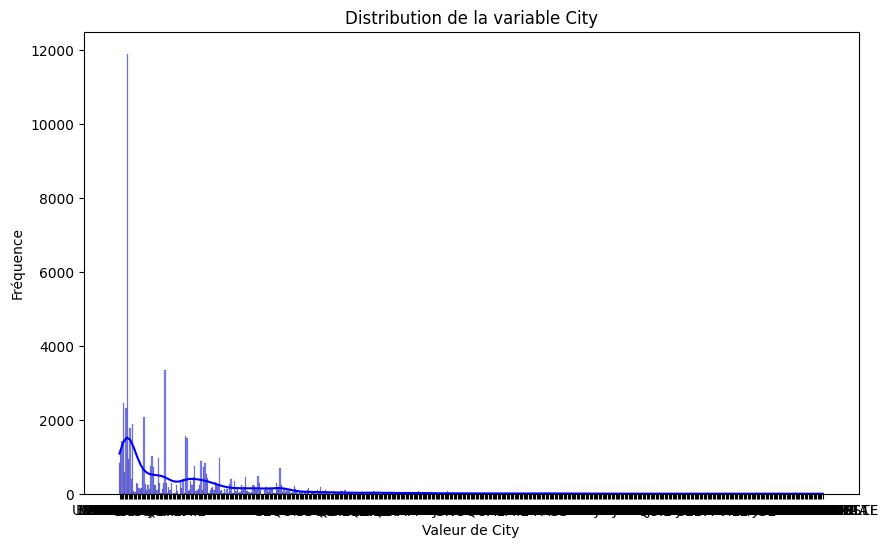

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(DataElecCar['City'], kde=True, color='blue', bins=30)
plt.title('Distribution de la variable City')
plt.xlabel('Valeur de City')
plt.ylabel('Fréquence')
plt.show()

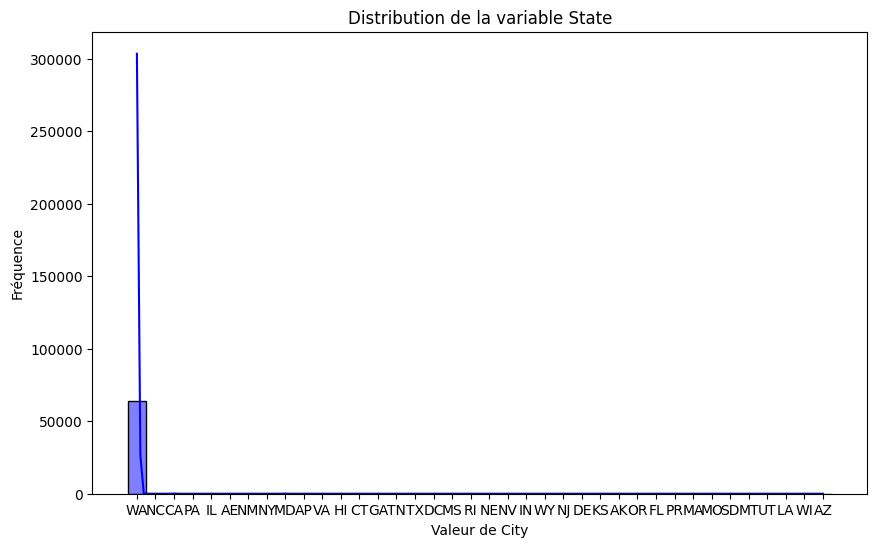

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(DataElecCar['State'], kde=True, color='blue', bins=30)
plt.title('Distribution de la variable State')
plt.xlabel('Valeur de City')
plt.ylabel('Fréquence')
plt.show()

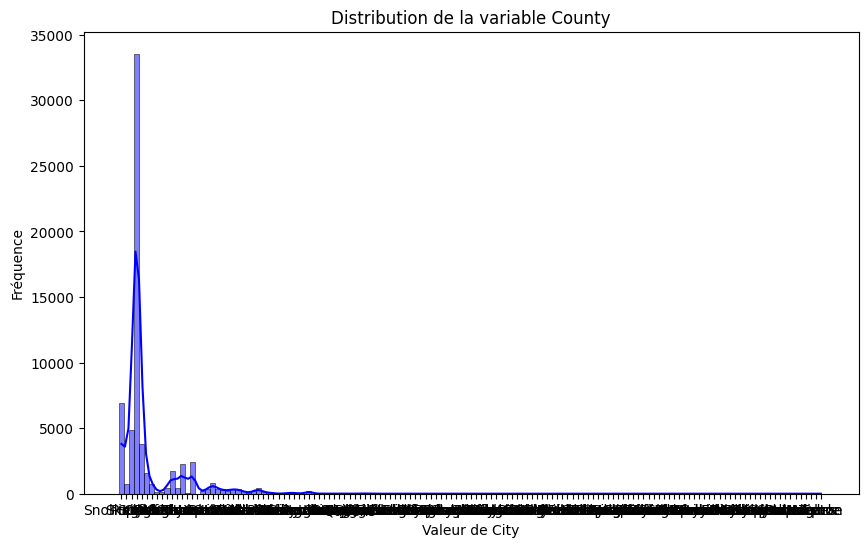

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(DataElecCar['County'], kde=True, color='blue', bins=30)
plt.title('Distribution de la variable County')
plt.xlabel('Valeur de City')
plt.ylabel('Fréquence')
plt.show()

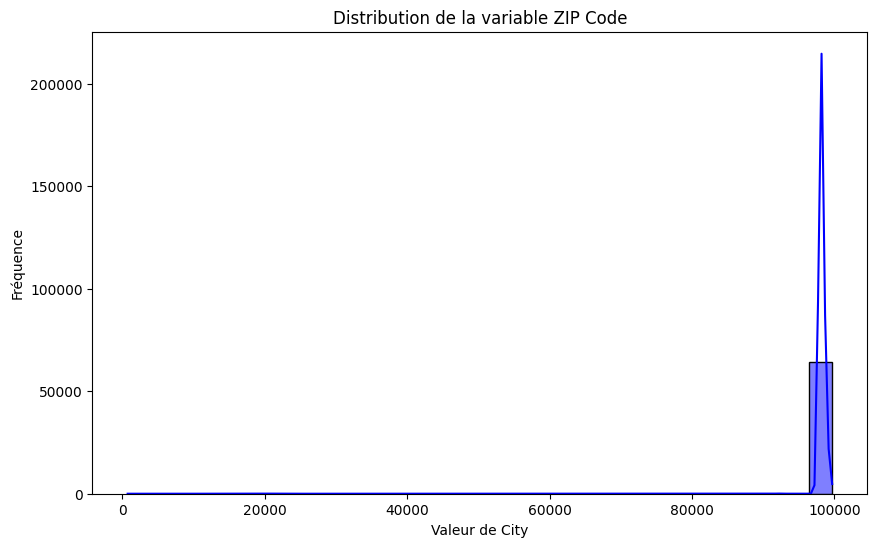

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(DataElecCar['ZIP Code'], kde=True, color='blue', bins=30)
plt.title('Distribution de la variable ZIP Code')
plt.xlabel('Valeur de City')
plt.ylabel('Fréquence')
plt.show()

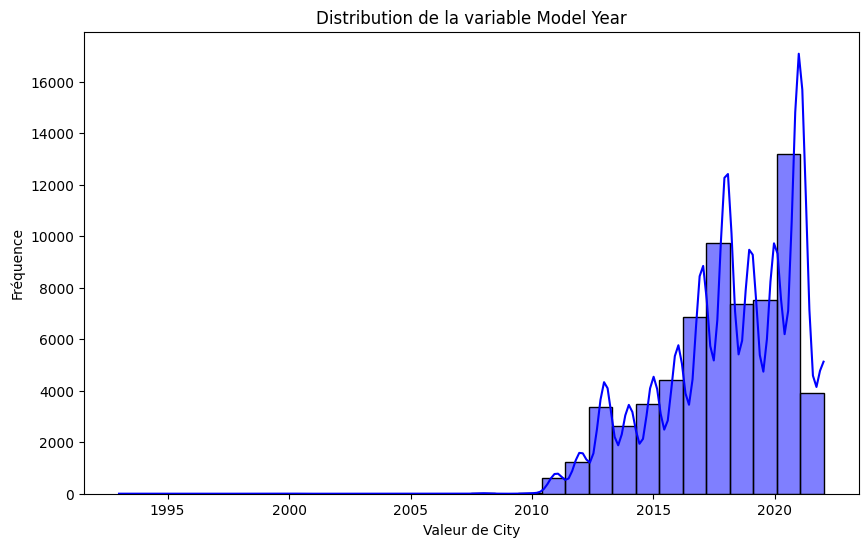

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(DataElecCar['Model Year'], kde=True, color='blue', bins=30)
plt.title('Distribution de la variable Model Year')
plt.xlabel('Valeur de City')
plt.ylabel('Fréquence')
plt.show()

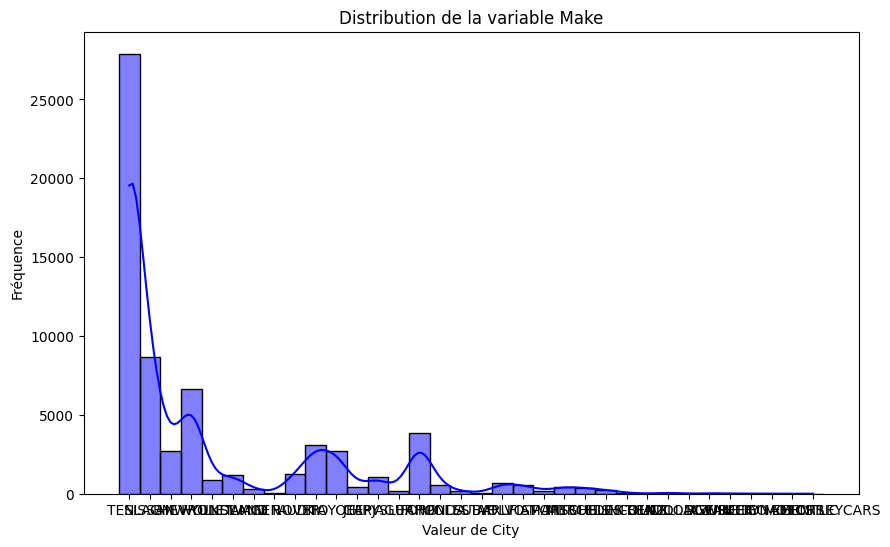

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(DataElecCar['Make'], kde=True, color='blue', bins=30)
plt.title('Distribution de la variable Make')
plt.xlabel('Valeur de City')
plt.ylabel('Fréquence')
plt.show()

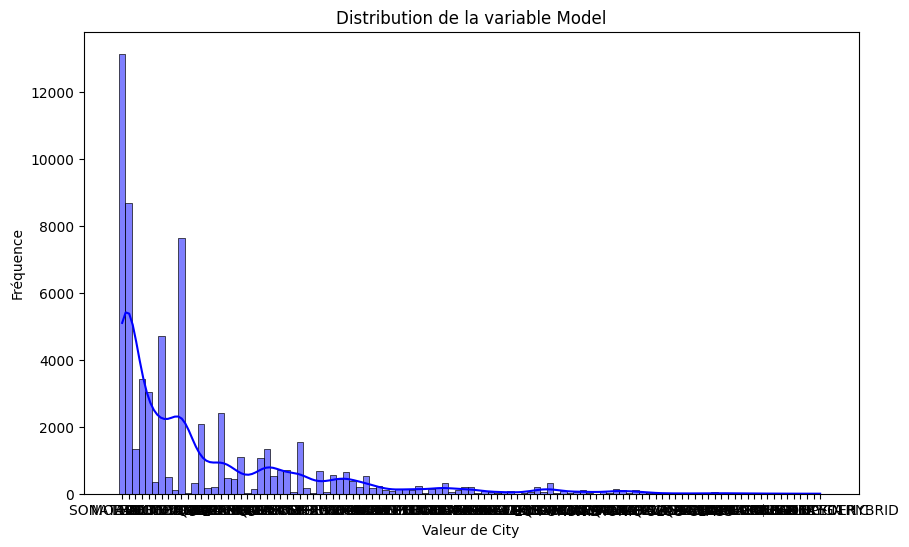

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(DataElecCar['Model'], kde=True, color='blue', bins=30)
plt.title('Distribution de la variable Model')
plt.xlabel('Valeur de City')
plt.ylabel('Fréquence')
plt.show()

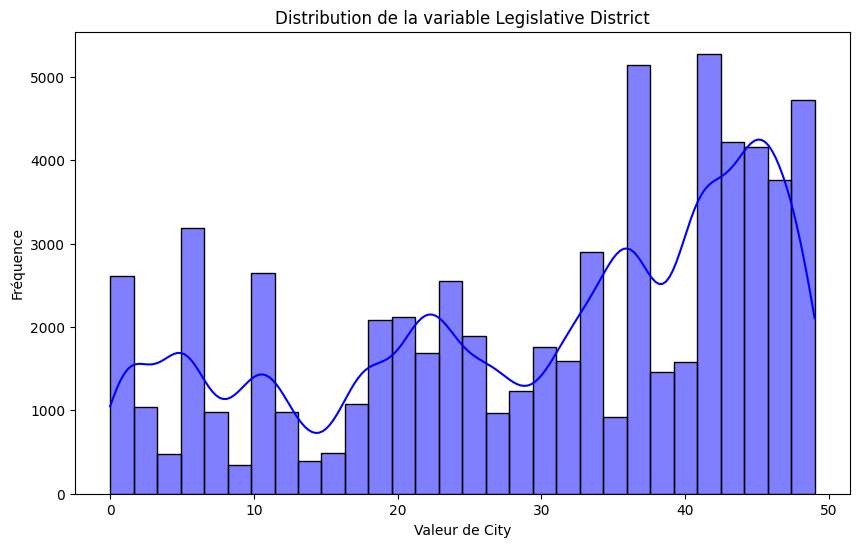

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(DataElecCar['Legislative District'], kde=True, color='blue', bins=30)
plt.title('Distribution de la variable Legislative District')
plt.xlabel('Valeur de City')
plt.ylabel('Fréquence')
plt.show()

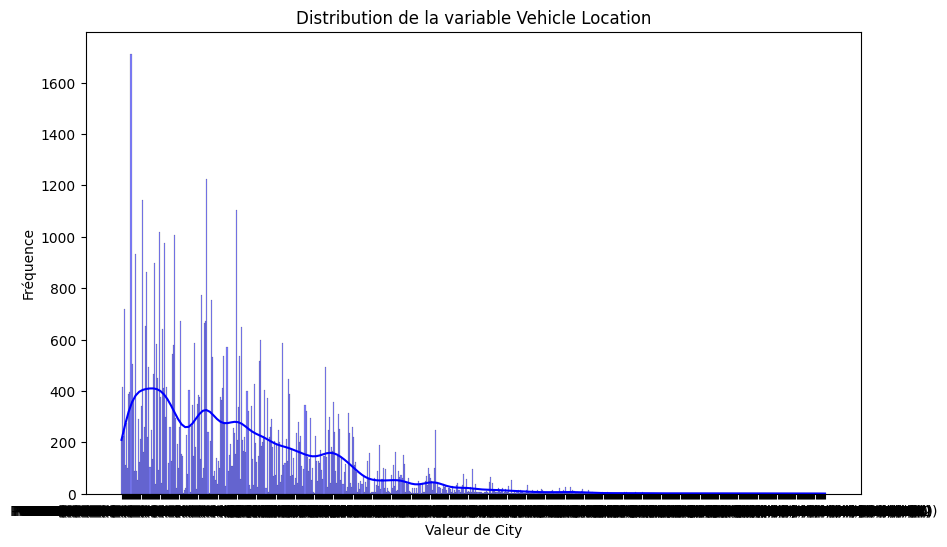

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(DataElecCar['Vehicle Location'], kde=True, color='blue', bins=30)
plt.title('Distribution de la variable Vehicle Location')
plt.xlabel('Valeur de City')
plt.ylabel('Fréquence')
plt.show()

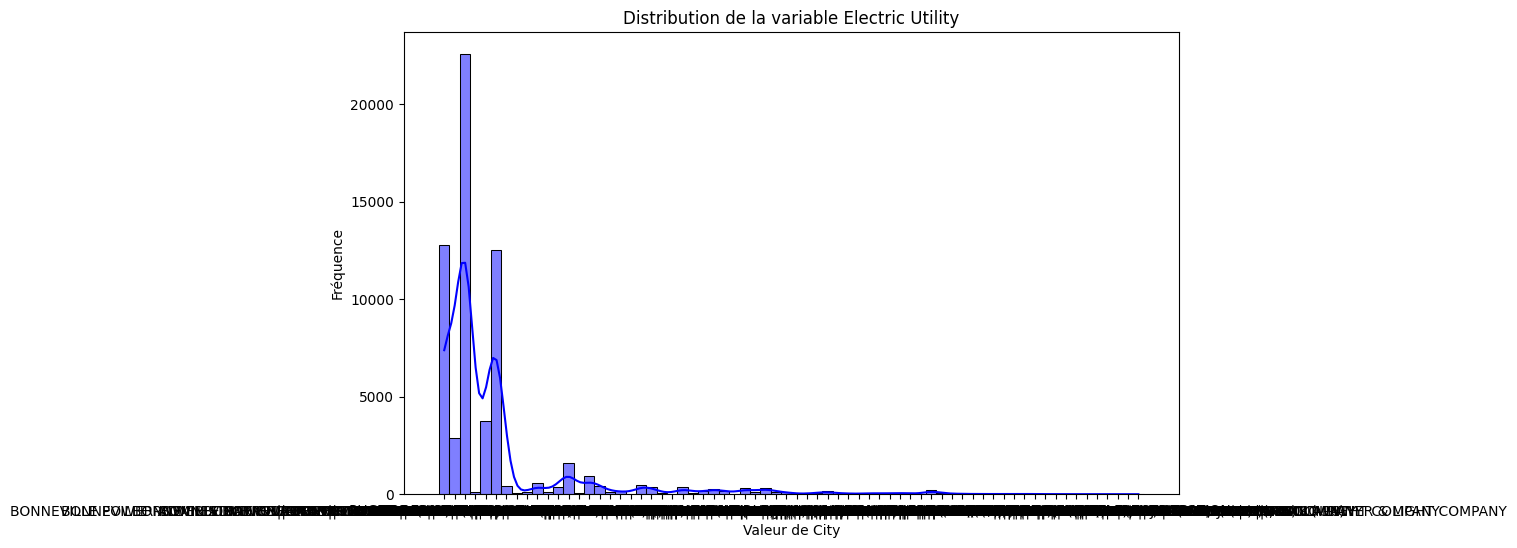

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(DataElecCar['Electric Utility'], kde=True, color='blue', bins=30)
plt.title('Distribution de la variable Electric Utility')
plt.xlabel('Valeur de City')
plt.ylabel('Fréquence')
plt.show()

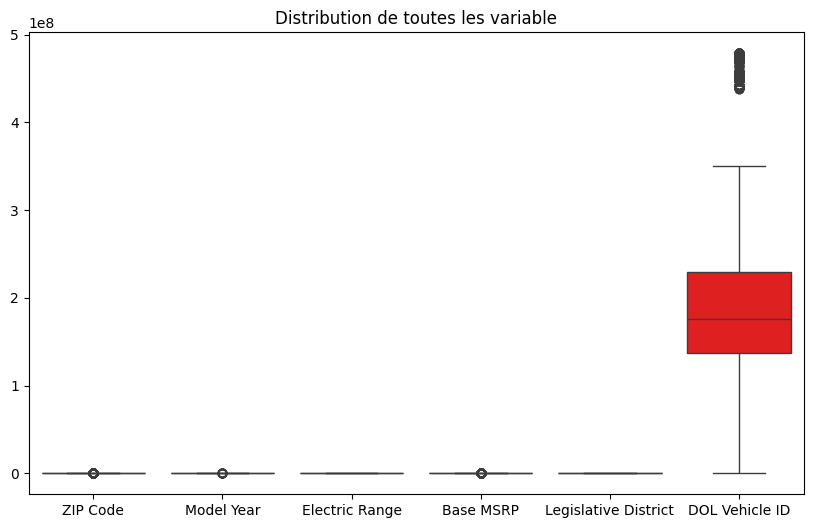

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(DataElecCar, color='red')
plt.title('Distribution de toutes les variable')
plt.show()

                      ZIP Code  ...  DOL Vehicle ID
ZIP Code              1.000000  ...       -0.000843
Model Year           -0.003737  ...       -0.116860
Electric Range       -0.010247  ...        0.041390
Base MSRP            -0.000139  ...        0.004771
Legislative District -0.389266  ...        0.001431
DOL Vehicle ID       -0.000843  ...        1.000000

[6 rows x 6 columns]
                      ZIP Code  ...  DOL Vehicle ID
ZIP Code              1.000000  ...       -0.000843
Model Year           -0.003737  ...       -0.116860
Electric Range       -0.010247  ...        0.041390
Base MSRP            -0.000139  ...        0.004771
Legislative District -0.389266  ...        0.001431
DOL Vehicle ID       -0.000843  ...        1.000000

[6 rows x 6 columns]


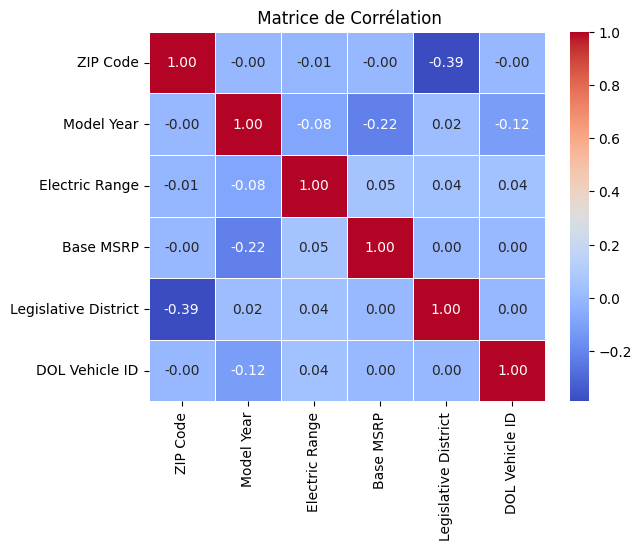

In [11]:
# Sélectionner uniquement les colonnes numériques
numeric_columns = DataElecCar.select_dtypes(include=['float64', 'int64'])

# Calculer la matrice de corrélation
MatriceCorr = numeric_columns.corr()

# Afficher la matrice de corrélation
print(MatriceCorr)

print(MatriceCorr)

plt.Figure=(10, 8)
sns.heatmap(MatriceCorr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title(' Matrice de Corrélation')
plt.show()

In [12]:
# Encodage des variables catégoriques
label_encoders = {}
for col in DataElecCarf.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    DataElecCarf[col] = label_encoders[col].fit_transform(DataElecCarf[col])

/var/folders/fd/b6_hc3516_b4khq0dtrt_gpr0000gn/T/ipykernel_1072/3806514369.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataElecCarf[col] = label_encoders[col].fit_transform(DataElecCarf[col])
/var/folders/fd/b6_hc3516_b4khq0dtrt_gpr0000gn/T/ipykernel_1072/3806514369.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataElecCarf[col] = label_encoders[col].fit_transform(DataElecCarf[col])
/var/folders/fd/b6_hc3516_b4khq0dtrt_gpr0000gn/T/ipykernel_1072/3806514369.py:5: SettingWithCopyWarning: 
A valu

In [13]:
print(DataElecCarf.head(3))

      ID  VIN (1-10)  ...  Electric Utility  Expected Price ($1k)
0  17684        1890  ...                65                   153
1  23013        3037  ...                65                    27
2   1724        4637  ...                20                    40

[3 rows x 18 columns]


In [14]:
correlation_target = DataElecCarf.corr()['Expected Price ($1k)'].sort_values(ascending=False)
print("\nCorrélation avec Expected Price ($1k):")
print(correlation_target)


Corrélation avec Expected Price ($1k):
Expected Price ($1k)                                 1.000000
Model Year                                           0.550285
Make                                                 0.471854
Electric Range                                       0.184855
VIN (1-10)                                           0.115229
Model                                                0.106175
Electric Utility                                     0.074855
Legislative District                                 0.048238
DOL Vehicle ID                                       0.021910
State                                                0.005347
ID                                                   0.001638
City                                                -0.018356
Clean Alternative Fuel Vehicle (CAFV) Eligibility   -0.049248
County                                              -0.051158
ZIP Code                                            -0.082532
Base MSRP                     

In [15]:
DataElecCarFV = DataElecCarf.drop(columns=['Base MSRP','ZIP Code', 'County', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
                                           'City', 'ID', 'State', 'DOL Vehicle ID', 'Legislative District', 'Electric Utility'])

In [16]:
X = DataElecCarFV.drop(columns=['Expected Price ($1k)'])
y = DataElecCarFV['Expected Price ($1k)']

In [17]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

In [18]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [22]:
from sklearn.svm import SVR 

In [19]:
Linear_model = LinearRegression() 

In [20]:
X_train=scaler_X.fit_transform(X_train)
X_val=scaler_X.transform(X_val)
X_test=scaler_X.transform(X_test)

y_train=scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_val=scaler_y.transform(y_val.values.reshape(-1, 1)).ravel()
y_test=scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

In [23]:
SVR_model = SVR()
X_train=scaler_X.fit_transform(X_train)
X_val=scaler_X.transform(X_val)
X_test=scaler_X.transform(X_test)

y_train=scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_val=scaler_y.transform(y_val.values.reshape(-1, 1)).ravel()
y_test=scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

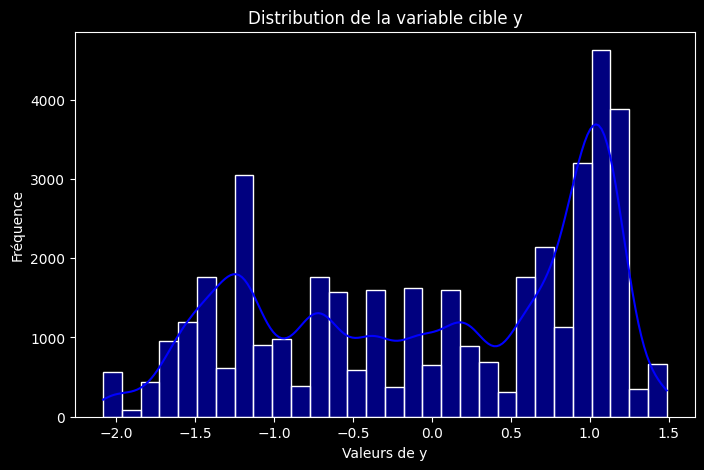

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(y_train, bins=30, kde=True, color="blue")
plt.xlabel("Valeurs de y")
plt.ylabel("Fréquence")
plt.title("Distribution de la variable cible y")
plt.show()

(40371, 7)
(40371,)


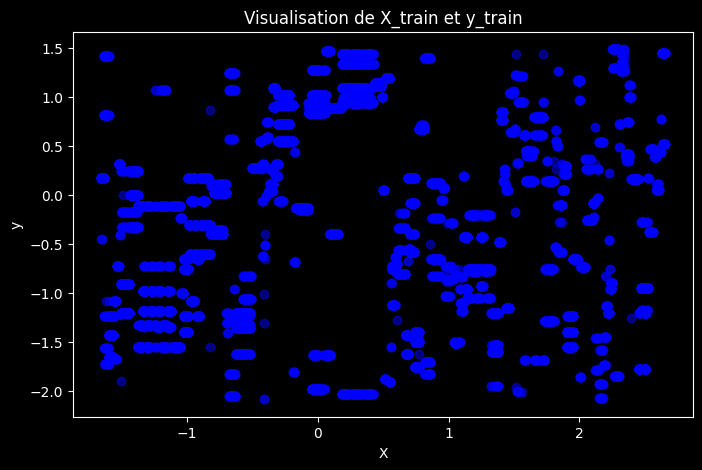

In [25]:
# Vérification des dimensions
print(X_train.shape)  # (n_samples, n_features)
print(y_train.shape)  # (n_samples,)

# Si X_train est 2D avec une seule colonne, le transformer en 1D
X_train_reshaped = X_train[:, 0]  # ou utiliser X_train.reshape(-1) si nécessaire

# Vérifier que les tailles correspondent
assert X_train_reshaped.shape[0] == y_train.shape[0], "Les tailles de X_train et y_train ne correspondent pas"

# Tracer le scatter plot
plt.figure(figsize=(8,5))
plt.scatter(X_train_reshaped, y_train, color="blue", alpha=0.5)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Visualisation de X_train et y_train")
plt.show()


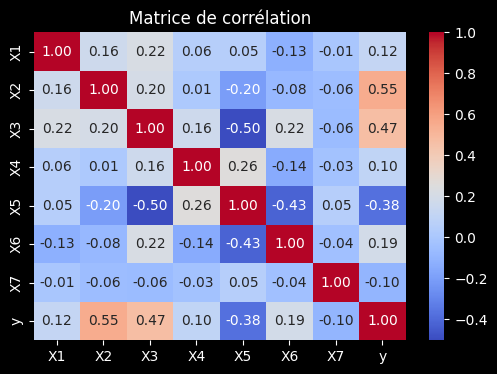

In [26]:
# Si X_train a plusieurs colonnes
df = pd.DataFrame(X_train, columns=[f"X{i+1}" for i in range(X_train.shape[1])])
df["y"] = y_train

plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()


In [21]:
Linear_model.fit(X_train, y_train)

LinearRegression()

In [27]:
SVR_model.fit(X_train, y_train)

SVR()

In [25]:
y_pred_scaled = Linear_model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

In [29]:
MSE = mean_squared_error(y_test, y_pred)
R_square = r2_score(y_test, y_pred) 


print(f'MSE= {MSE}\nR_square = {R_square}')

MSE= 16061.724592386965
R_square = -16077.865932440232


In [30]:
from sklearn.metrics import mean_absolute_error

MSE = mean_squared_error(y_test, y_pred)
R_square = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)

print(f'MSE= {MSE}\nR_square = {R_square}\nMAE = {MAE}')


MSE= 16061.724592386965
R_square = -16077.865932440232
MAE = 120.52278129178133


In [31]:
import numpy as np

print(f"Min y_test: {np.min(y_test)}, Max y_test: {np.max(y_test)}")
print(f"Min y_pred: {np.min(y_pred)}, Max y_pred: {np.max(y_pred)}")


Min y_test: -2.065075138404581, Max y_test: 1.488528617592437
Min y_pred: 11.839797636390998, Max y_pred: 188.08496808451116


In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [33]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)


In [34]:
print(f"Min y_test: {np.min(y_test)}, Max y_test: {np.max(y_test)}")
print(f"Min y_pred: {np.min(y_pred)}, Max y_pred: {np.max(y_pred)}")


Min y_test: -2.065075138404581, Max y_test: 1.488528617592437
Min y_pred: -1.838391489812929, Max y_pred: 1.116522966955923


In [28]:
y_pred_scaled = SVR_model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))


MSE= 0.10373185338999015
R_square = 0.896157442248029
MAE = 0.18301344605843645
Min y_test: -2.065075138404581, Max y_test: 1.488528617592437
Min y_pred: -1.838391489812929, Max y_pred: 1.116522966955923


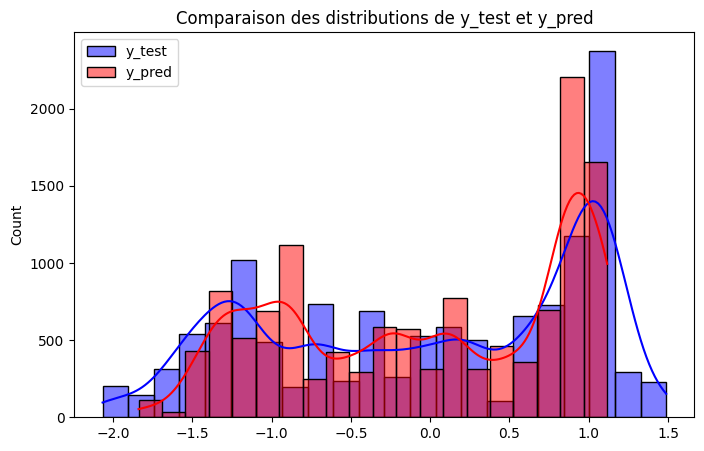

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Normalisation des features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraînement du modèle
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train_scaled, y_train)

# Prédictions
y_pred = model.predict(X_test_scaled)

# Évaluation des performances
MSE = mean_squared_error(y_test, y_pred)
R_square = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)

print(f'MSE= {MSE}\nR_square = {R_square}\nMAE = {MAE}')

# Vérification des plages de valeurs
print(f"Min y_test: {np.min(y_test)}, Max y_test: {np.max(y_test)}")
print(f"Min y_pred: {np.min(y_pred)}, Max y_pred: {np.max(y_pred)}")

# Visualisation de la distribution
plt.figure(figsize=(8,5))
sns.histplot(y_test, color="blue", label="y_test", kde=True)
sns.histplot(y_pred, color="red", label="y_pred", kde=True)
plt.legend()
plt.title("Comparaison des distributions de y_test et y_pred")
plt.show()


MSE= 0.2062892008948979
R_square = 0.7934906438333866
MAE = 0.19933362085378337
Min y_test: -2.065075138404581, Max y_test: 1.488528617592437
Min y_pred: -2.0446503756693617, Max y_pred: 1.436228041832033


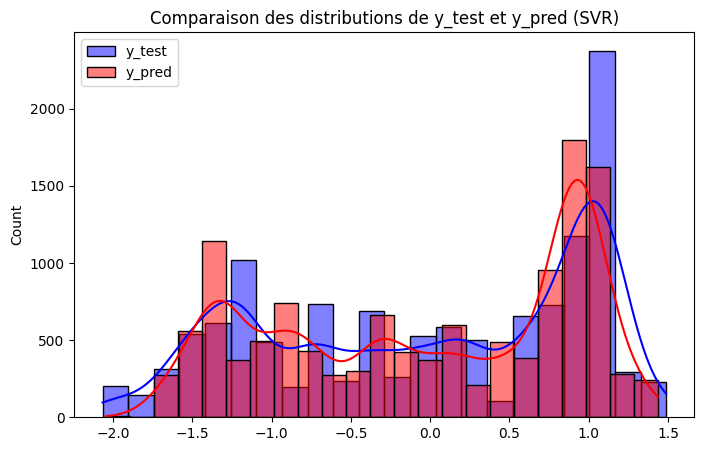

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , RobustScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Normalisation des données
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()  # SVR attend un vecteur 1D

# Initialisation et entraînement du modèle SVR
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # Kernel RBF (Radial Basis Function)
svr.fit(X_train_scaled, y_train_scaled)

# Prédictions (on revient à l'échelle originale)
y_pred_scaled = svr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Évaluation des performances
MSE = mean_squared_error(y_test, y_pred)
R_square = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)

print(f'MSE= {MSE}\nR_square = {R_square}\nMAE = {MAE}')

# Vérification des plages de valeurs
print(f"Min y_test: {np.min(y_test)}, Max y_test: {np.max(y_test)}")
print(f"Min y_pred: {np.min(y_pred)}, Max y_pred: {np.max(y_pred)}")

# Visualisation de la distribution
plt.figure(figsize=(8,5))
sns.histplot(y_test, color="blue", label="y_test", kde=True)
sns.histplot(y_pred, color="red", label="y_pred", kde=True)
plt.legend()
plt.title("Comparaison des distributions de y_test et y_pred (SVR)")
plt.show()


In [ ]:
print(y_pred)

[[147.19332547]
 [175.23726359]
 [ 42.71655175]
 ...
 [ 83.8494866 ]
 [ 70.77823017]
 [181.38110803]]


In [31]:
MSE = mean_squared_error(y_test, y_pred)
R_square = r2_score(y_test, y_pred) 

print(f'MSE= {MSE}\nR_square = {R_square}')


MSE= 17408.051100135955
R_square = -17425.629262266408


In [ ]:
from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres possibles
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf']
}

# Créer l'objet SVR
SVR_model = SVR()

# Recherche par grille
grid_search = GridSearchCV(SVR_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)




In [ ]:
# Afficher les meilleurs paramètres
print(f"Meilleurs paramètres : {grid_search.best_params_}")

# Utiliser les meilleurs paramètres pour prédire
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculer MSE et R²
MSE = mean_squared_error(y_test, y_pred)
R_square = r2_score(y_test, y_pred)

print(f'MSE = {MSE}\nR_square = {R_square}')

In [ ]:
X_train = scaler_X.fit_transform(X_train)
X_val = scaler_X.transform(X_val)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_val = scaler_y.transform(y_val.reshape(-1, 1)).ravel()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

# Création du modèle SVR
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train, y_train)

# Prédictions
y_pred_scaled = svr_model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))  # Remettre à l'échelle d'origine

print(y_pred)
mean_squared_error, r2_score

In [ ]:
y_test_pred = SVR_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)